## Bellabeat Case Study : Google Capstone Project


### Author: Chris Jones

Last updated: 09/01/2022

## Background:
You are a junior data analyst working on the marketing analyst team at Bellabeat, a high-tech manufacturer of health-focused
products for women. Bellabeat is a successful small company, but they have the potential to become a larger player in the
global smart device market. Urška Sršen, cofounder and Chief Creative Officer of Bellabeat, believes that analyzing smart
device fitness data could help unlock new growth opportunities for the company. You have been asked to focus on one of
Bellabeat’s products and analyze smart device data to gain insight into how consumers are using their smart devices. The
insights you discover will then help guide marketing strategy for the company.


## Business Task:
Analyze smart device usage data to derive insights for an existing Bellabeat product. Use insights to hypothesize solutions for making Bellabeat a larger player in the smart device market.

**Key Questions:**
* What trends can be found with the Fitbit usage data?
* How can these trends transfer to Bellabeat customers?
* How can these trends be exploited for product and marketing decisions?


## Fitbit Dataset
* **Where is your data stored?**
    * These datasets were generated by respondents to a distributed survey via Amazon Mechanical Turk between 03.12.2016-05.12.2016 
    * DOI: 10.5281/zenodo.53894 
    

* **How is the data organized? Is it in long or wide format?** 
   * Most data sets are organized in long format. With exceptions to the wide files including minute data for steps, calories and intentisties
   

* **Are there issues with bias or credibility in this data? Does your data ROCCC?** 
    * This data set meets the minimum sample size rule of 30. With 33 FitBit users to sample data from, the analysis is capable of deriving good insights into smart device usage
    * Data is recent
    * Data observes smart device usage of products that are highly similar to Bellabeat’s, making the data credible for the business task 
    * 3rd party data is open source and widely available 
    
    
* **How are you addressing licensing, privacy, security, and accessibility?** 
    * Data is verified as a licensed public domain where the owner waives rights to the work
    
    
* **How did you verify the data’s integrity?** 
    * Data is comprised of crowd-sourced Fitbit datasets
    
    
* **How does it help you answer your question?** 
    * This data can be used to influence marketing decisions or functions for Bellabeat products
    
    
* **Are there any problems with the data?**
    * Data is small with only 33 participants. There is also no separation between race, gender, or other demographics. This may lead to trends or insights that aren’t as accurate for Women as Bellabeat is focused on women’s health products


## Data Cleaning 

The following datasets were chosen for analysis:

* Daily_Activity_merged 
* hourlyCalories_merged 
* hourlyIntensities_merged
* hourlySteps_merged
* sleepDay_merged
* heartrate_seconds_merged
* weightLogInfo_merged


### Loading packages


In [1]:
library(tidyverse)
library(skimr)
library(janitor)
library(patchwork)
library(lubridate)
library(ggplot2)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


Attaching package: ‘janitor’


The following objects are masked from ‘package:stats’:

    chisq.test, fisher.test



Attaching package: ‘lubridate’


The following objects are masked from ‘package:base’:

    date, intersect, setdiff, union




### Importing Data

In [2]:
dailyActivity_merged <- read_csv("../input/fitbit/Fitabase Data 4.12.16-5.12.16/dailyActivity_merged.csv")
hourlyCalories_merged <- read_csv("../input/fitbit/Fitabase Data 4.12.16-5.12.16/hourlyCalories_merged.csv")
hourlyIntensities_merged <- read_csv("../input/fitbit/Fitabase Data 4.12.16-5.12.16/hourlyIntensities_merged.csv")
hourlySteps_merged <- read_csv("../input/fitbit/Fitabase Data 4.12.16-5.12.16/hourlySteps_merged.csv")
sleepDay_merged <- read_csv("../input/fitbit/Fitabase Data 4.12.16-5.12.16/sleepDay_merged.csv")
heartrate_seconds_merged <- read_csv("../input/fitbit/Fitabase Data 4.12.16-5.12.16/heartrate_seconds_merged.csv")
weightLogInfo_merged <- read_csv("../input/fitbit/Fitabase Data 4.12.16-5.12.16/weightLogInfo_merged.csv")

Rows: 940 Columns: 15
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (1): ActivityDate
dbl (14): Id, TotalSteps, TotalDistance, TrackerDistance, LoggedActivitiesDi...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 22099 Columns: 3
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): ActivityHour
dbl (2): Id, Calories

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 22099 Columns: 4
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): ActivityHour
dbl (3): Id, TotalIntensity, AverageIntensity

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_ty

Now I use clean_names to make the data more readable and check the data types using str()

In [3]:
dailyActivity_merged %>% 
  clean_names() %>% 
  str()
hourlyCalories_merged %>% 
  clean_names() %>% 
  str()
hourlyIntensities_merged %>% 
  clean_names() %>% 
  str()
hourlySteps_merged %>% 
  clean_names() %>% 
  str()
sleepDay_merged %>% 
  clean_names() %>% 
  str()
heartrate_seconds_merged %>% 
  clean_names() %>% 
  str()
weightLogInfo_merged %>% 
  clean_names() %>% 
  str()

spec_tbl_df [940 × 15] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ id                        : num [1:940] 1.5e+09 1.5e+09 1.5e+09 1.5e+09 1.5e+09 ...
 $ activity_date             : chr [1:940] "4/12/2016" "4/13/2016" "4/14/2016" "4/15/2016" ...
 $ total_steps               : num [1:940] 13162 10735 10460 9762 12669 ...
 $ total_distance            : num [1:940] 8.5 6.97 6.74 6.28 8.16 ...
 $ tracker_distance          : num [1:940] 8.5 6.97 6.74 6.28 8.16 ...
 $ logged_activities_distance: num [1:940] 0 0 0 0 0 0 0 0 0 0 ...
 $ very_active_distance      : num [1:940] 1.88 1.57 2.44 2.14 2.71 ...
 $ moderately_active_distance: num [1:940] 0.55 0.69 0.4 1.26 0.41 ...
 $ light_active_distance     : num [1:940] 6.06 4.71 3.91 2.83 5.04 ...
 $ sedentary_active_distance : num [1:940] 0 0 0 0 0 0 0 0 0 0 ...
 $ very_active_minutes       : num [1:940] 25 21 30 29 36 38 42 50 28 19 ...
 $ fairly_active_minutes     : num [1:940] 13 19 11 34 10 20 16 31 12 8 ...
 $ lightly_active_minutes    : num 

### Here I notice that the date columns are in the Charater Data type

I aim to complete the following:

* Use Lubridate to change data types
* Use mutate to create new variables


#### Daily Activity 

In [4]:
daily_activity_clean <- dailyActivity_merged %>% 
  mutate(
    ActivityDate = mdy(ActivityDate), 

    total_activity_minutes = LightlyActiveMinutes +
      FairlyActiveMinutes +
      VeryActiveMinutes,
    
    percent_very_active = (VeryActiveMinutes/total_activity_minutes),
    
    total_minutes_tracked = SedentaryMinutes +
      LightlyActiveMinutes +
      FairlyActiveMinutes +
      VeryActiveMinutes,
    )

#### Daily Sleep

In [5]:
daily_sleep_clean <- sleepDay_merged %>% 
  mutate(
    SleepDay = mdy_hms(SleepDay),
    date = date(SleepDay),
    hours_sleep = (TotalMinutesAsleep/60)
    )

#### Hourly Intensity/Calories/Steps

In [6]:
hourlyCalories_clean <- hourlyCalories_merged %>%
  mutate(
    date = date(mdy_hms(ActivityHour)),
    hour = hour(mdy_hms(ActivityHour)),
  )

hourlyIntensities_clean <- hourlyIntensities_merged %>%
  mutate(
    date = date(mdy_hms(ActivityHour)),
    hour = hour(mdy_hms(ActivityHour))
  )
   
hourlySteps_clean <- hourlySteps_merged %>%
  mutate(
    date = date(mdy_hms(ActivityHour)),
    hour = hour(mdy_hms(ActivityHour))
  )

### Now I join the daily and hourly tables together for easier analysis 
* I join by "Id" and respective date

In [7]:
daily_data <- left_join(daily_activity_clean, daily_sleep_clean, by = c('ActivityDate' = 'SleepDay', "Id")) %>% 
  drop_na() 
   
  
hourly_merge <- left_join(hourlyIntensities_clean, hourlyCalories_clean, by = c("Id", "ActivityHour")) %>% 
  drop_na()
   
  
hourly_data <- left_join(hourly_merge, hourlySteps_clean, by = c("Id", "ActivityHour")) %>% 
  drop_na() %>% 
  select(-hour.x, -hour.y, -date.x, -date, -date.y)

# Clean hourly_data to have hours and date

hourly_data$ActivityHour=as.POSIXct(hourly_data$ActivityHour, format="%m/%d/%Y %I:%M:%S %p", tz=Sys.timezone())
 hourly_data$time <- format(hourly_data$ActivityHour, format = "%H:%M:%S")
 hourly_data$date <- format(hourly_data$ActivityHour, format = "%m/%d/%y")

## Analysis and Vizualization

**First, I wanted to see how many participants were recording data for each smart device feature**

[1] 33

[1] 24

[1] 14

[1] 8

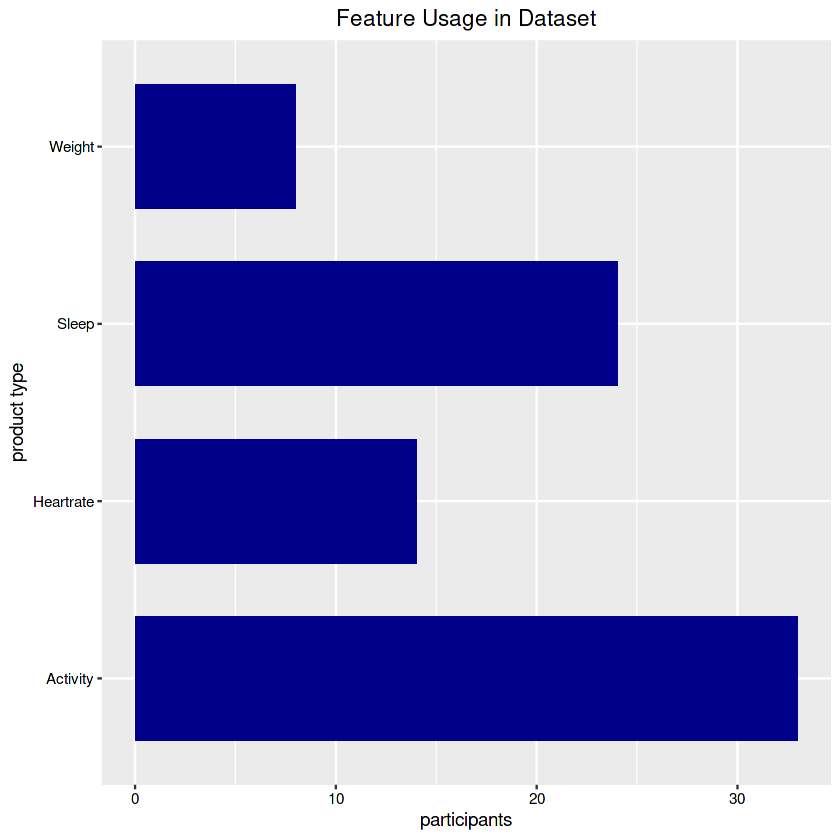

In [8]:
n_distinct(dailyActivity_merged$Id)
n_distinct(sleepDay_merged$Id)
n_distinct(heartrate_seconds_merged$Id)
n_distinct(weightLogInfo_merged$Id)

product_type <- c("Activity","Sleep","Heartrate","Weight")
participants <- c(33,24,14,8)
 
distinct <- data.frame(product_type,participants) 
  
ggplot(distinct, aes(x= product_type, y = participants)) + 
  geom_bar(stat= "identity", width = 0.7, fill = "darkblue") +
  theme(axis.text.x = element_text(color = 'black'),
        axis.text.y = element_text(color = 'black'),
        plot.title = element_text(hjust = 0.5)) +
  xlab("product type") +
  labs(title = 'Feature Usage in Dataset') +
  coord_flip()

We can see that the daily activity (Steps, Calories, Intensity) had the most participants. This tells us that customers in general are more prone to using **automatic features** compared to manual ones. The lack of a minimum of 30 participants also adds limitations to the sleep, heatrate, and weight data tables. Management could use this information to focus on automatic features, or develop better features. For example, promote a seamless weight tracker in the app that notifies the user of improvements. 

**Next I looked for a trend between average intensity and calories**

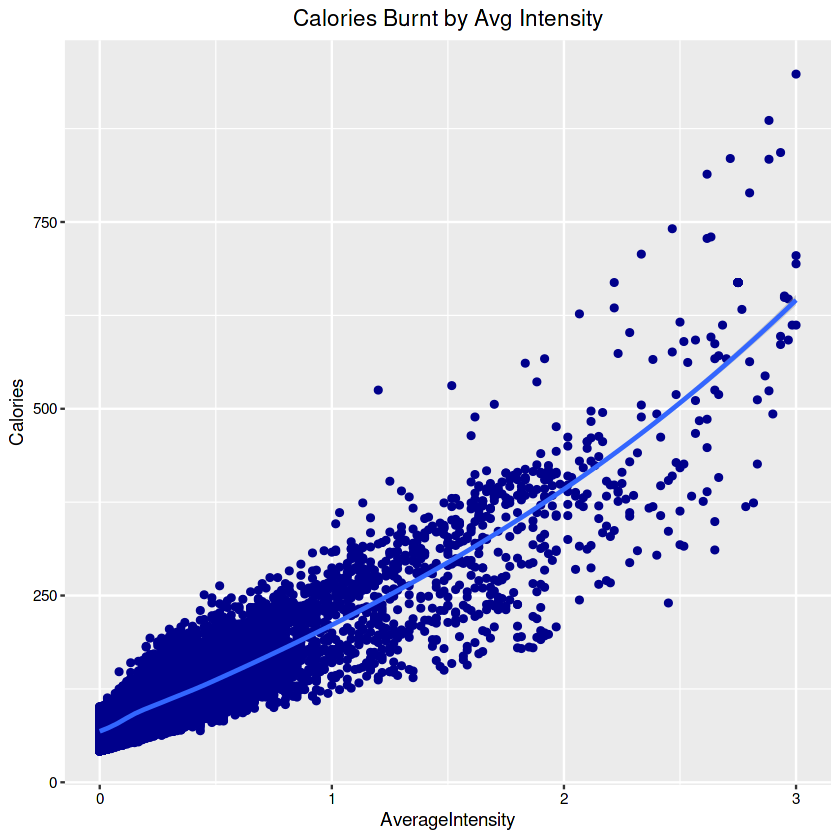

In [9]:
ggplot(data=hourly_data,aes(x = AverageIntensity, y = Calories)) + geom_point(color = 'darkblue') +
  labs(title = "Calories Burnt by Avg Intensity") + 
    theme(plot.title = element_text(hjust = 0.5),
          axis.text.x = element_text(color = 'black'),
          axis.text.y = element_text(color = 'black')) + 
  geom_smooth(formula = y ~ x, method = "loess")

We can see that there is a clear trend between the two. This can be useful to design programs in the app that focus on incentivizing increased average intensity. 

**Next I looked at average intensity over time**

Warning message:
“Ignoring unknown parameters: binwidth, bins, pad”


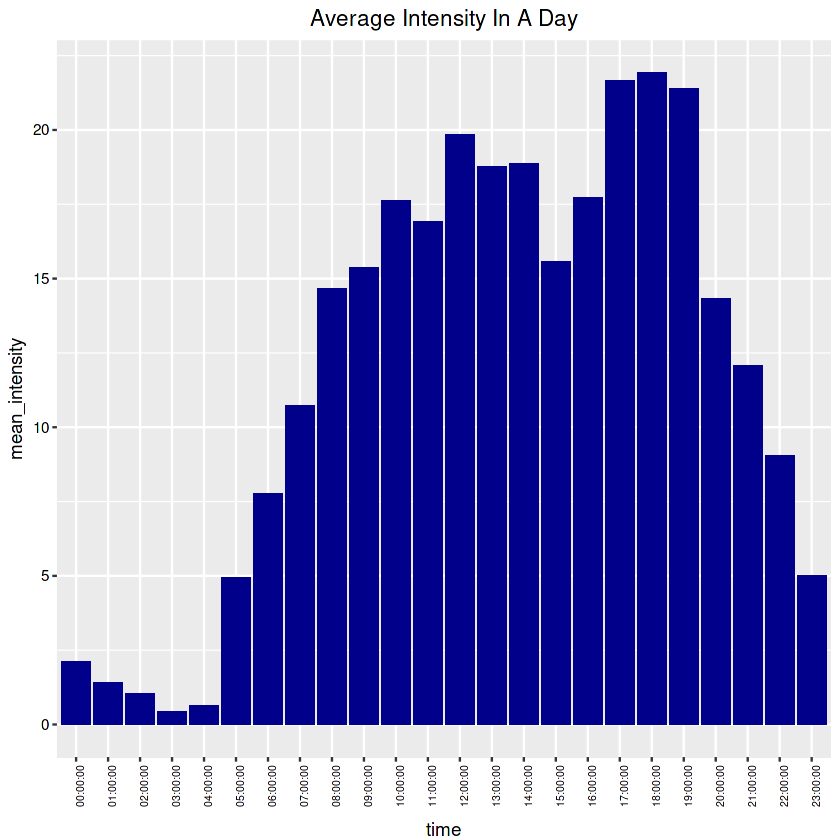

In [10]:
grouped_hourly <- hourly_data %>% 
  group_by(time) %>% 
  drop_na() %>% 
  summarise(mean_intensity = mean(TotalIntensity))

ggplot(grouped_hourly) + geom_histogram(aes(x = time, y = mean_intensity),stat = "identity",fill = 'darkblue') + 
  theme(axis.text.x = element_text(angle = 90, size = 6, color = 'black'),
        axis.text.y = element_text(color = 'black'),
        plot.title = element_text(hjust = 0.5),
        axis.title.y = element_text(hjust = 0.5, vjust = 1.2),
        axis.title.x = element_text(vjust = -1)) +
        labs(title = "Average Intensity In A Day")

This data shows us that higher average intensity occurs mostly early afternoon and evening. This can be useful in pinpointing good times for reminder notifications. 

**Next I want to see if those that perform more "Very Active" minutes burn more calories**

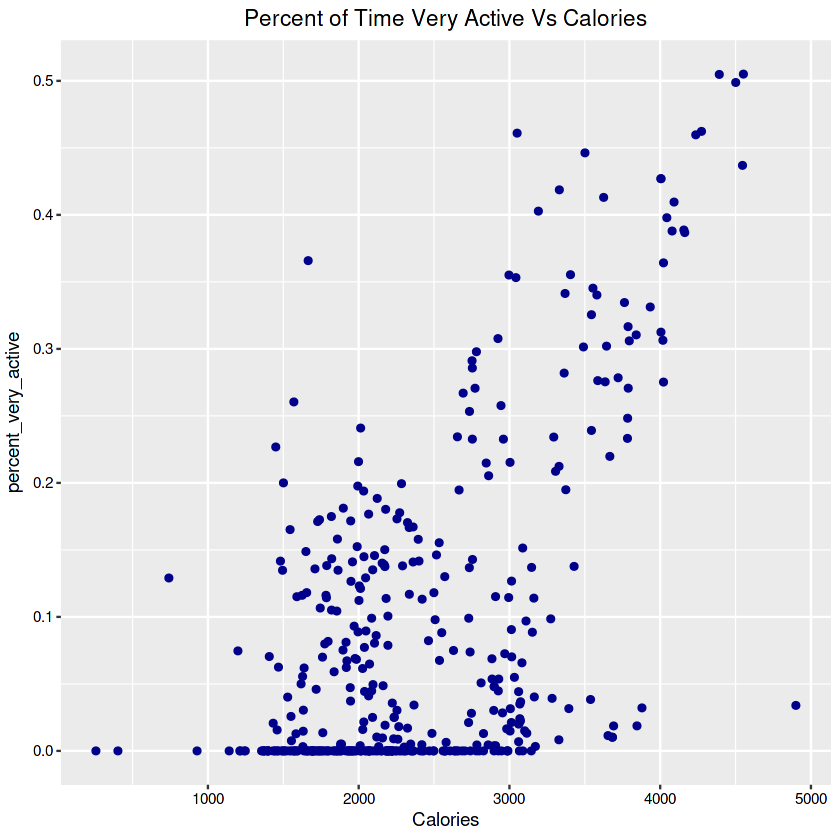

In [11]:
ggplot(daily_data) + geom_point(aes(x = Calories, y = percent_very_active), color = 'darkblue') +
  theme(plot.title = element_text(hjust = 0.5),
        axis.title.y = element_text(vjust = 1.8),
        axis.text.x = element_text(color = 'black'),
        axis.text.y = element_text(color = 'black')) +
  labs(title = "Percent of Time Very Active Vs Calories")

The graph shows incorporating more "Very Active" minutes into your exercise session will lead to more calories burnt. 


**Finally, I wanted to find a trend that promoted increased steps instead of intensity for customers that may prefer lower intensity exercise.**

To do this, I chose to seperate the participants into volume of steps and calculated the average calories burnt between categories. 

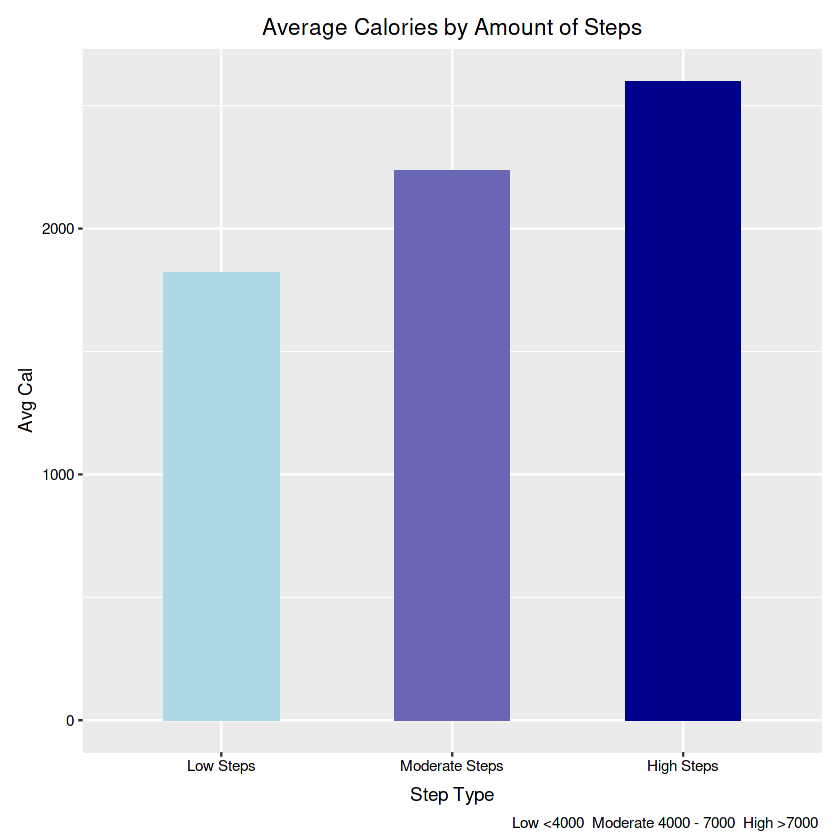

In [12]:
step_amount_data <- daily_data %>% 
  summarise(
    step_type = factor(case_when(
      TotalSteps < 4000 ~ "Low Steps",
      TotalSteps > 4000 & TotalSteps < 7000 ~ "Moderate Steps",
      TotalSteps > 7000 ~ "High Steps"),
      levels = c("Low Steps", "Moderate Steps", "High Steps")),
      Calories, .group=Id, TotalSteps) %>% 
      drop_na()

step_summary_data <- step_amount_data %>% 
  group_by(step_type) %>% 
  summarise( avg_cal = mean(Calories)) 
    
ggplot(step_summary_data, aes(x= step_type, y = avg_cal, fill = avg_cal)) + 
    geom_bar(stat = 'identity', width = 0.5) +
      labs(title = "Average Calories by Amount of Steps") +
      xlab("Step Type") +
      ylab("Avg Cal") +
        theme( axis.text.x = element_text(color = 'black'),
        axis.title.x = element_text(vjust = -0.5),
         axis.text.y = element_text(color = 'black'),
         plot.title = element_text(hjust = 0.5),
         legend.position = "none") +
  scale_fill_gradient(low="lightblue",high="darkblue") +
  plot_annotation(caption= "Low <4000  Moderate 4000 - 7000  High >7000 ")

Higher steps in a day will lead to more calories burnt per day.

## Conclusion 

 
### Recommendations 
1. From the amount data received for different features. We can see that automatic features are more likely to be utilized. Marketing team should focus on pushing automatic features that are appealing to smart device customers. Management can also pursue solutions to less-used features. This could be by makinig the weight tracker more interactive. They could also notify users before bed that its time to sleep. These changes would go well with the Bellabeat app that advertizes keeping on top of mindful habits.   
2. Most of the data pointed towards intensity and step count being major drivers of calorie count. The marketing team could add a program in the Bellabeat app that tells the user when to increase intensity during a workout to make sure a certain average intensity is reached. For those that prefer following a metric like steps, the app can use a milestone system that incentivizes users to reach a step count during their exercise. These changes will add more interaction between device and user. If the team can get their users to burn more calories, the users will realize better results which will bolster their reputation and make them a bigger player in the smart device market.
3. My strongest recommendation would be to start collecting their own data from their customers. This data is good for smart-devices in general; however, for a niched company such as Bellabeat, first-party data would yield better insights when trying to cater to their personal audience. I would suggest gathering other types of data that relate to Bellabeat products like stress levels, menstural cycles, and water consumption.  

## Limitations 
**Data is Third-party** - Although the data derives good insight for smart device users as a whole, the data represens Fitbit users of unknown demographic. This may lead to skewed insights or a company that focuses on Women's health products specifically.

**Data is small** - This dataset represents a maximum of 33 people at once. This number can lead to useful insights; however, this means biased or false answers can greatly change the results of the analysis. 

**Aknowledgements**

The following Kaggle posts helped me throughout this process:
* https://www.kaggle.com/code/fabianl42/bellabeat-case-study-google-da-capstone-project
* https://www.kaggle.com/code/chebotinaa/bellabeat-case-study-with-r#Fixing-formatting
* https://www.kaggle.com/code/anahay/bellabeat-case-study